Using Boston dataset to work a predictive model of MLR (Multiple linear regression) in Python

In [1]:
import pandas as pd
import numpy as np

In [2]:
## Import the Boston Housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
## below coe gives the 13 column names corresponding to figures above

print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
## Use .DESCR to obtain more information about what exists within the columns and variables that link them
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
## rename columns so intuitive and don't have to refer back to DESC file
bos.columns = ['crime', 'res_land', 'bus_land', 'riv_flag', 'nox_conc',
               'avg_rooms', 'p1940_perc', 'dist_emp', 'high_acc', 
               'tax_rate', 'teach_ratio', 'bk_perc', 'low_stat_perc']

# Add 14th variable which contains 'MEDV' described above
bos['value_000'] = boston.target
#use head to check df again
bos.head()

,crime,res_land,bus_land,riv_flag,nox_conc,avg_rooms,p1940_perc,dist_emp,high_acc,tax_rate,teach_ratio,bk_perc,low_stat_perc,value_000
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
# Create a test_train data set using SKLearn, to build model and review it

from sklearn.model_selection import train_test_split
bos_train, bos_test = train_test_split(bos, test_size = 0.3, random_state=4)

In [7]:
# Check that we have what we want print the shape of the dataset 
print(bos_train.shape)
print(bos_test.shape)

(354, 14)
(152, 14)


In [2]:
!pip install statsmodels --upgrade

Requirement already up-to-date: statsmodels in c:\program files\anaconda3-2018.12\lib\site-packages (0.9.0)


Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProxyError('Cannot connect to proxy.', OSError('Tunnel connection failed: 407 Proxy Authentication Required'))': /simple/statsmodels/
Retrying (Retry(total=3, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProxyError('Cannot connect to proxy.', OSError('Tunnel connection failed: 407 Proxy Authentication Required'))': /simple/statsmodels/
Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProxyError('Cannot connect to proxy.', OSError('Tunnel connection failed: 407 Proxy Authentication Required'))': /simple/statsmodels/
Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProxyError('Cannot connect to proxy.', OSError('Tunnel connection failed: 407 Proxy Authentication Required'))': /simple/statsmodels/
Retrying (Retry(total=0, connect=Non

In [1]:
# build the linear regression model, can use SkLearn - but use statsmodels as more user friendly presentations
import statsmodels.api as sm

ImportError: cannot import name 'factorial' from 'scipy.misc' (C:\Program Files\Anaconda3-2018.12\lib\site-packages\scipy\misc\__init__.py)

In [9]:
Y = bos_train['value_000']. values # Y is target for models

X = bos_train[['crime','riv_flag', 'nox_conc', 'avg_rooms', 'high_acc']] # X contains predictors for the model
X = sm.add_constant(X.values) # When using statsmodels need a constant for the alpha term

mlr = sm.OLS(Y,X).fit() # perform multiple linear regression
mlr.summary() # model diagostics

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     93.10
Date:                Wed, 01 Jul 2020   Prob (F-statistic):           5.16e-62
Time:                        10:36:24   Log-Likelihood:                -1116.8
No. Observations:                 354   AIC:                             2246.
Df Residuals:                     348   BIC:                             2269.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.7259      3.908     -4.024      0.000     -23.412      -8.040
x1            -0.1605      0.044     -3.618      0.000      -0.248      -0.073
x2             6.5506      1.414      4.631      0.000       3.769       9.333
x3           -11.1867      3.404     -3.286      0.001     -17.882      -4.492
x4             7.1982      0.500     14.399      0.000       6.215       8.181
x5            -0.0625      0.051     -1.225      0.221      -0.163       0.038
==============================================================================
Omnibus:                      133.143   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              607.405
Skew:                           1.557   Prob(JB):                    1.27e-132
Kurtosis:                       8.611   Cond. No.                         241.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
Predicted_AVG_Price = -15.7259 + -0.1605 * 0.00632 + 6.5506 * 0 + - 11.1867 * 0.538 + 7.1982 * 6.575 + -0.0625 * 1
print(Predicted_AVG_Price)

25.52030604


In [11]:
## belot allows to plot the MLR (multiple linear regression) on a graph
import matplotlib.pyplot as plt

In [12]:
bos_train['mlr_pred'] = mlr.predict(X) #make predictions

C:\Users\lv62480\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


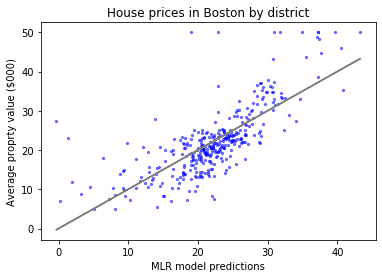

In [13]:
## use matplot lib to product a scatter plot
## model predictions against actuals
plt.scatter(bos_train['mlr_pred'], bos_train['value_000'], s=5, c='blue', alpha = 0.5)
plt.title('House prices in Boston by district')
plt.xlabel('MLR model predictions')
plt.ylabel('Average proprty value ($000)')
plt.plot(bos_train['mlr_pred'],bos_train['mlr_pred'],c = 'grey')
plt.show()

In [14]:
# Visualise residuals on new graph. Calculate risiduals and store in a new column
bos_train['residual'] = bos_train['mlr_pred'] - bos_train['value_000']

C:\Users\lv62480\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


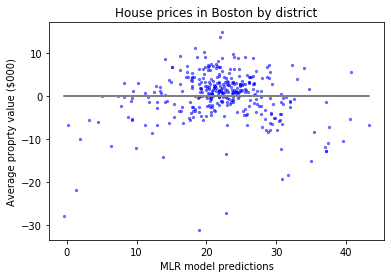

In [15]:
## use matplot lib to product a scatter plot
## model predictions against risiduals
plt.scatter(bos_train['mlr_pred'], bos_train['residual'], s=5, c='blue', alpha = 0.5)
plt.title('House prices in Boston by district')
plt.xlabel('MLR model predictions')
plt.ylabel('Average proprty value ($000)')
plt.plot(bos_train['mlr_pred'],bos_train['mlr_pred']*0,c = 'grey')
plt.show()

In [16]:
## Produce a Q-Q plot of the residuals
bos_train['residual2'] = (bos_train['residual'] - np.mean(bos_train['residual']) / np.std(bos_train['residual'])
fig = sm.qqplot(bos_train['residual2'])
plt.plot(bos_train['residual2'], bos_train['residual2', c = 'grey')
plt.show()
                                        

SyntaxError: invalid syntax (<ipython-input-16-793af2d35000>, line 3)

In [17]:
## Once happy with addressing issues in training set - recreate X from the test data

X = bos_test[['crime','riv_flag', 'nox_conc', 'avg_rooms', 'high_acc']] # X contains predictors for the model
X = sm.add_constant(X.values) # When using statsmodels need a constant for the alpha term

## Add then score the data using our model (which was training on the training data)
bos_test['mlr_pred'] = mlr.predict(X) # make predictions


C:\Users\lv62480\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


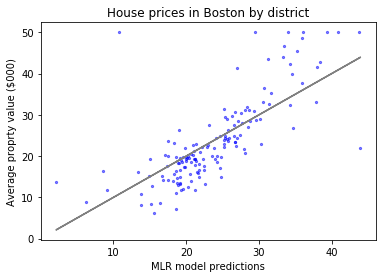

In [18]:
## use matplotlib to product a scatter plot
## model predictions against actuals 

plt.scatter(bos_test['mlr_pred'], bos_test['value_000'], s=5, c='blue', alpha = 0.5)
plt.title('House prices in Boston by district')
plt.xlabel('MLR model predictions')
plt.ylabel('Average proprty value ($000)')
plt.plot(bos_test['mlr_pred'],bos_test['mlr_pred'],c = 'grey')
plt.show()

the test data, looks extremely similar to the plot in figure 3.6, from the training data. It includes fewer observations
this time, because we are using 30%, not 70% of the original data, but the overall shape is the same.

## Logistical regression

we will continue to work with the familiar Boston dataset. However, in order to demonstrate how logistic regression works, we will change the data in the outcome variable, which currently contains the average house prices for each district, so that it contains a ‘1’ if the average house price is greater than $20,000 and a ‘0’ if not.
In practice, we would rarely do this. If our outcome variable is continuous then it is usually most effective
to simply use linear regression, rather than transform the data so that a logistic regression can be applied.

In [19]:
## Create a binary variable from the original continuous variable 
bos_train['value_000_binary'] = np.where(bos_train['value_000'] > 20,1,0)
bos_train['value_000_binary'] = np.where(bos_train['value_000'] > 20,1,0)

C:\Users\lv62480\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\lv62480\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
Y = bos_train['value_000_binary'].values # The Y object contains the target for the model

X = bos_train[['crime','riv_flag','nox_conc','avg_rooms','high_acc']] # The X object contains the predictors for the model
X = sm.add_constant(X) # Statsmodel needs to have a constant for the alpha term (95% variable)

#log = sm.OLF(Y,X).fit()
log = sm.Logit(Y,X).fit() # perform logistic regression 
log.summary() # model diagostics 

Optimization terminated successfully.
         Current function value: 0.445884
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  354
Model:                          Logit   Df Residuals:                      348
Method:                           MLE   Df Model:                            5
Date:                Wed, 01 Jul 2020   Pseudo R-squ.:                  0.3390
Time:                        13:18:14   Log-Likelihood:                -157.84
converged:                       True   LL-Null:                       -238.80
Covariance Type:            nonrobust   LLR p-value:                 3.859e-33
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.5474      2.244     -2.472      0.013      -9.946      -1.149
crime         -0.2072      0.077     -2.695      0.007      -0.358      -0.057
riv_flag       1.7669      0.811      2.178      0.029       0.177       3.357
nox_conc      -7.4827      1.810     -4.134      0.000     -11.030      -3.935
avg_rooms      1.6353      0.333      4.909      0.000       0.982       2.288
high_acc       0.0501      0.032      1.542      0.123      -0.014       0.114
==============================================================================
"""

In [29]:
## Divide the predictions into groups, 0-10%, 10-20% etc.
bos_train['log_pred_bins'] = pd.cut(bos_train['log_pred'], np.arange(0,1,0.1))
bos_train_summary = bos_train.groupby('log_pred_bins').agg({'value_000_binary':'mean', 'log_pred':['mean','count']})
bos_train_summary = bos_train_summary.reset_index()
bos_train_summary.columns = ['log_pred_bins','perc_20k', 'avg_pred', 'count']

KeyError: 'log_pre'

In [24]:
bos_train_summary

NameError: name 'bos_train_summary' is not defined

In [25]:
bos_train['log_pred_bins'] = pd.cut(bos_train['log_pred'], np.arange(0,1,0.1))

KeyError: 'log_pred'